In [14]:
# install required dependency
pip install tensorflow==2.18.0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# import dependencies
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

In [5]:
# load dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
# ( size of train data , 28 x 28 pixels )
x_train.shape

(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

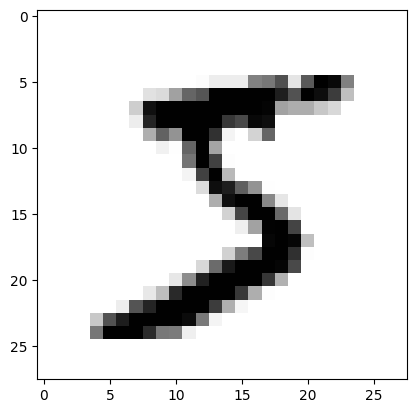

In [7]:
# to visualize data
plt.imshow(x_train[0] , cmap = plt.cm.binary)
plt.show

In [10]:
# scale the data
x_train = keras.utils.normalize(x_train , axis=1)
x_test =  keras.utils.normalize(x_test , axis=1)

In [22]:
# buils , train & compile model
model = keras.models.Sequential()
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = tf.nn.relu))
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile( optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])
model.fit(x_train , y_train , epochs = 4)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8719 - loss: 0.4564
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1110
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.0715
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0510


In [23]:
# calculate validation loss and accuracy
val_loss , val_acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1011


In [25]:
model.save("mnist.keras")

In [54]:
from keras.activations import softmax
new_model = keras.models.load_model("mnist.keras" , custom_objects={"softmax_v2" : softmax})
predictions = new_model.predict(x_test)
print(np.argmax(predictions[0]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
7
